### Import Libraries

In [19]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Dataset

Data was obtained through a SQL query from a public dataset on BigQuery

In [20]:
df = pd.read_csv('bquxjob_5d05c574_1845a50507b.csv')
df.head()

,country_name,country_code,indicator_name,indicator_code,value,year,country_code_1,short_name,region
0,Australia,AUS,Percentage of students in upper secondary educ...,UIS.FEP.3,47.510941,1993,AUS,Australia,East Asia & Pacific
1,Australia,AUS,Percentage of students in upper secondary educ...,UIS.FEP.3,47.624790,1994,AUS,Australia,East Asia & Pacific
2,Australia,AUS,Percentage of students in upper secondary educ...,UIS.FEP.3,47.875370,1995,AUS,Australia,East Asia & Pacific
3,Australia,AUS,Percentage of students in upper secondary educ...,UIS.FEP.3,47.418350,1996,AUS,Australia,East Asia & Pacific
4,Australia,AUS,Percentage of students in upper secondary educ...,UIS.FEP.3,48.202850,1997,AUS,Australia,East Asia & Pacific


##### All data pertains to percentage of students in upper secondary education

### Data Overview

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    365 non-null    object 
 1   country_code    365 non-null    object 
 2   indicator_name  365 non-null    object 
 3   indicator_code  365 non-null    object 
 4   value           365 non-null    float64
 5   year            365 non-null    int64  
 6   country_code_1  365 non-null    object 
 7   short_name      365 non-null    object 
 8   region          365 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 25.8+ KB


### Process the Data

###### Check for duplicates

In [22]:
df.duplicated().sum()

0

###### Remove unnecessary data

In [23]:
# Drop second country code column, indicator_name, indicator_code, and short_name
df1 = df.drop(['country_code_1', 'indicator_name', 'indicator_code', 'short_name'], axis = 1)
df1.head()

,country_name,country_code,value,year,region
0,Australia,AUS,47.510941,1993,East Asia & Pacific
1,Australia,AUS,47.624790,1994,East Asia & Pacific
2,Australia,AUS,47.875370,1995,East Asia & Pacific
3,Australia,AUS,47.418350,1996,East Asia & Pacific
4,Australia,AUS,48.202850,1997,East Asia & Pacific


###### Check for misfielded values

In [24]:
# Any values over 100%
df1.loc[df1['value'] > 100]

,country_name,country_code,value,year,region


In [25]:
# Any values over 0%
df1.loc[df1['value'] < 0]

,country_name,country_code,value,year,region


In [26]:
# Most recent year should not exceed 2022
print(df1['year'].max())
# Oldest year cannot preceed 1944 which was when the World Bank was founded
print(df1['year'].min())

2014
1980


In [27]:
# Every country should be from the East Asia & Pacific Region
df1.loc[df1['region'] != 'East Asia & Pacific']

,country_name,country_code,value,year,region


###### Spelling Check

In [28]:
# Country names
df1['country_name'].value_counts()

Australia                    22
Korea, Rep.                  20
New Zealand                  20
Singapore                    19
Japan                        18
Mongolia                     17
Brunei Darussalam            17
Lao PDR                      17
Malaysia                     17
Indonesia                    16
Macao SAR, China             16
Samoa                        16
Hong Kong SAR, China         14
China                        13
Fiji                         13
Thailand                     12
Myanmar                      12
Philippines                  12
Kiribati                     11
Cambodia                     10
Marshall Islands              9
Palau                         9
Solomon Islands               8
Vanuatu                       7
Timor-Leste                   7
Tonga                         4
Tuvalu                        3
Micronesia, Fed. Sts.         2
Papua New Guinea              2
Korea, Dem. People’s Rep.     1
Vietnam                       1
Name: co

Some abbreviations but it checks out

In [29]:
# Country codes
df1['country_code'].value_counts()

AUS    22
KOR    20
NZL    20
SGP    19
JPN    18
MNG    17
BRN    17
LAO    17
MYS    17
IDN    16
MAC    16
WSM    16
HKG    14
CHN    13
FJI    13
THA    12
MMR    12
PHL    12
KIR    11
KHM    10
MHL     9
PLW     9
SLB     8
VUT     7
TLS     7
TON     4
TUV     3
FSM     2
PNG     2
PRK     1
VNM     1
Name: country_code, dtype: int64

They are all 3 characters long, and they check out

###### Missing Values 

In [30]:
percent_missing = df1.isnull().sum() * 100 / len(df1)
missing_values_df = pd.DataFrame({'percent_missing': percent_missing})

missing_values_df

,percent_missing
country_name,0.0
country_code,0.0
value,0.0
year,0.0
region,0.0


### Data Analysis and Visualizations

#### Cambodia

In [32]:
# Cambodia DataFrame
khm = df1.loc[df1['country_name'] == 'Cambodia']
khm

,country_name,country_code,value,year,region
39,Cambodia,KHM,34.833179,1998,East Asia & Pacific
40,Cambodia,KHM,34.400681,1999,East Asia & Pacific
41,Cambodia,KHM,34.021488,2000,East Asia & Pacific
42,Cambodia,KHM,32.326611,2001,East Asia & Pacific
43,Cambodia,KHM,32.186649,2002,East Asia & Pacific
44,Cambodia,KHM,33.404659,2003,East Asia & Pacific
45,Cambodia,KHM,35.737560,2004,East Asia & Pacific
46,Cambodia,KHM,38.847691,2006,East Asia & Pacific
47,Cambodia,KHM,40.440868,2007,East Asia & Pacific
48,Cambodia,KHM,41.366581,2008,East Asia & Pacific


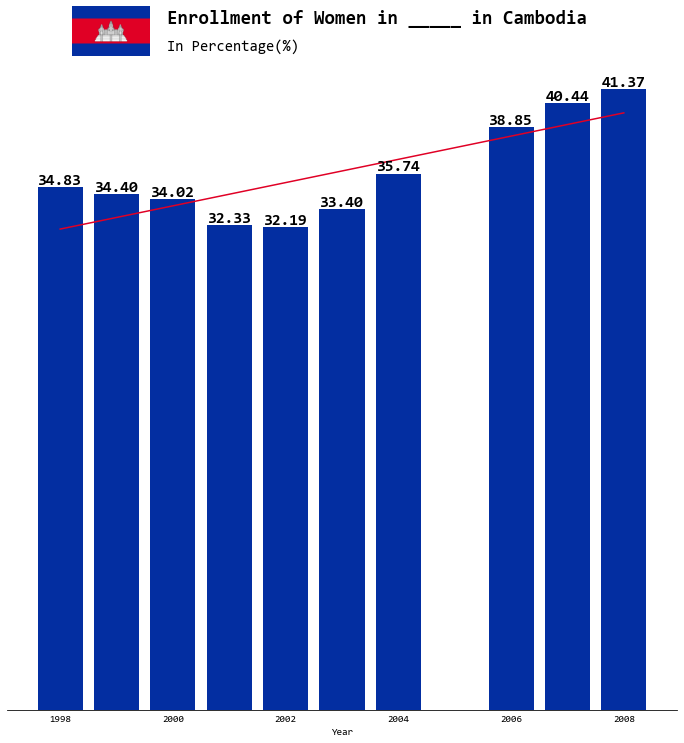

In [33]:
# Graph
fig, ax = plt.subplots(figsize = (12,12))

# Colors, font, and fontsize 
text_c = 'black'
markers_c = ''
plt.rcParams['font.family'] = 'Consolas'
plt.rcParams.update({'font.size': 16})

# Background
background='white'
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

# Remove the ticks
ax.tick_params(axis='both', length=0, colors=text_c)

# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set axis labels
ax.set_xlabel('Year', color = 'black')
ax.set_yticklabels([]) # Removes the values in the y axis

# Values
x = khm['year']
y = khm['value']
bar = ax.bar(x = x, height = y, color = '#032EA1', zorder = 1) # Color code for the blue in Cambodia's flag

# Fit a line through the bar graph
from numpy.polynomial.polynomial import polyfit
m, b = np.polyfit(x, y,deg=1)
plt.plot(x, m*x+b, color = '#E00025', zorder = 2)


# Bar label
ax.bar_label(bar, color = text_c, fmt='%.2f', fontweight = 'bold')

# Title
fig.text(x=0.31, y=.92,s='Enrollment of Women in _____ in Cambodia', fontsize = 19, color = text_c, fontweight = 'bold')
fig.text(x=0.31, y=.89,s='In Percentage(%)', color = text_c, fontsize = 15,fontweight = 'regular')

# NFL logo (to go to the far left on the title level)
import matplotlib.image as image

logo = fig.add_axes([.20,.866,.09,.09])
logo.axis('off')
img =image.imread('Flag-of-Cambodia.png')
logo.imshow(img)

plt.show()

### Singapore

In [34]:
# Singapore DataFrame
sgp = df1.loc[df1['country_name'] == 'Singapore']
# Dataframe for enrollment from 1980 to 1995 (before 12 year skip)
sgp1 = sgp[:-3]

In [35]:
# Yearly change in enrollment from 1980 to 1995 (before 12 year skip)
percent_change = sgp1['value'].pct_change()
pd.DataFrame({'year':sgp1['year'], 'value':sgp1['value'], 'percent_change_in_%':percent_change*100})

,year,value,percent_change_in_%
304,1980,40.327309,NaN
305,1981,40.353828,0.065761
306,1982,38.045292,-5.720737
307,1983,39.646770,4.209400
308,1984,41.950371,5.810310
309,1985,40.844452,-2.636255
310,1986,41.638111,1.943126
311,1987,41.446548,-0.460066
312,1988,40.707642,-1.782795
313,1989,40.998638,0.714845


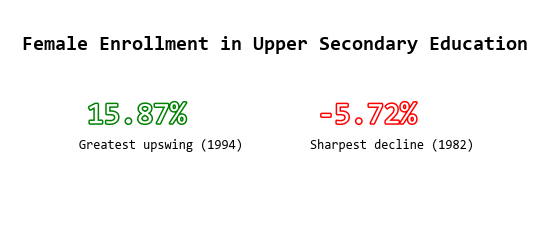

<Figure size 432x288 with 0 Axes>

In [36]:
import matplotlib.patheffects as path_effects

# Form the figure
fig,ax = plt.subplots(figsize=(8, 4))

# Add text
title = fig.text(0.59, 0.75,"Female Enrollment in Upper Secondary Education", ha='center', va='center', size=20, fontweight='bold')

text1 = fig.text(0.35, 0.5, '15.87%', color='white',
                          ha='center', va='center', size=30)
text1.set_path_effects([path_effects.Stroke(linewidth=3, foreground='green'),
                       path_effects.Normal()])
text2 = fig.text(0.25, 0.4, 'Greatest upswing (1994)', va='center', size = 13)

text3 = fig.text(0.75, 0.5, '-5.72%', color='white',
                          ha='center', va='center', size=30)
text3.set_path_effects([path_effects.Stroke(linewidth=3, foreground='red'),
                       path_effects.Normal()])
text4 = fig.text(0.65, 0.4, 'Sharpest decline (1982)', va='center', size = 13)


# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove axis labels
ax.set_xticklabels([])
ax.set_yticklabels([]) 

# Remove the ticks
ax.tick_params(axis='both', length=0, colors=text_c)

plt.show()

# Save
plt.savefig(fname = 'Text Only Practice', dpi=400, format='png')